In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256    # dimension of each image is 256*256 pixels
CHANNELS=3
EPOCHS=25

# Importing Data from directory

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\User\\Desktop\\CNN\\Potato_Dataset_mini', shuffle = True, 
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 644 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
# there are 2152 images(1000, 1000, 152) and we have batch size of 32 . 
#  so 2152/32 gives 67.25 i.ei we have 68 batches in total out of that 67 of batch size 32 and one last with less image

In [6]:
len(dataset)

21

In [7]:
for image_batch, label_batch in dataset.take(1):   # there are 32 images in one batch
    print(image_batch[0].shape)     # showing any one image into tensor of shape=(256, 256, 3) 3 for channels (R, G, B)
    print(label_batch)  # showing from of 3 categories the 32 images are (0 - Potato___Early_blight, 1 - Potato___Late_blight, 2 - Potato___healthy)

(256, 256, 3)
tf.Tensor([0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 2 1 0 0 0 0 0 1 0 1 0 1 0 1 0], shape=(32,), dtype=int32)


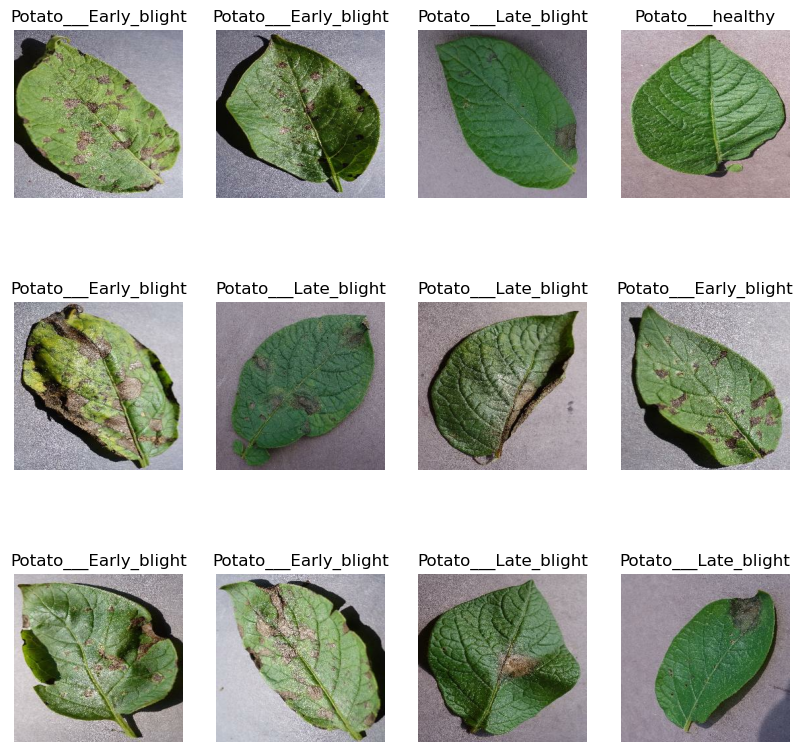

In [8]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):   
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')
   

# TRAIN_TEST_SPLIT

In [9]:
def get_dataset_partitions_tf(ds, train_split=0.7, val_split=0.15, test_split=0.15, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [10]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [11]:
len(train_ds), len(val_ds), len(test_ds)   # no of batches in each train_test_validation

(14, 3, 4)

In [12]:
# Cache, Shuffle, and Prefetch the Dataset

# the first time data is loaded from disk, it’s stored → subsequent epochs don’t reload images again.

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Creating a Layer for Resizing and Normalization

In [14]:
resize_and_rescale = tf.keras.Sequential([layers.Resizing(IMAGE_SIZE, IMAGE_SIZE), layers.Rescaling(1./255)])

# Data Augmentation

In [15]:
data_augmentation = tf.keras.Sequential([layers.RandomFlip('horizontal_and_vertical'), layers.RandomRotation(0.2)])

# Applying Data Augmentation to Train Dataset

In [16]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

# Model Architecture

In [17]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
#from tensorflow.keras import layers, models
#from tensorflow.keras.callbacks import EarlyStopping

#input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
#n_classes = 3


#model = models.Sequential([
#    resize_and_rescale,  # your preprocessing layer
    
    # Conv Block 1
#    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
#    layers.BatchNormalization(),
#    layers.MaxPooling2D((2,2)),
#    #layers.Dropout(0.25),
    
    # Conv Block 2
#    layers.Conv2D(64, (3,3), activation='relu'),
#    layers.BatchNormalization(),
#    layers.MaxPooling2D((2,2)),
#    #layers.Dropout(0.25),
    
    # Conv Block 3
#    layers.Conv2D(64, (3,3), activation='relu'),
#    layers.BatchNormalization(),
#    layers.MaxPooling2D((2,2)),
    #layers.Dropout(0.25),
    
    # Fully Connected
#    layers.Flatten(),
#    layers.Dense(64, activation='relu'),
#    layers.BatchNormalization(),
    #layers.Dropout(0.25),
    
    # Output
#    layers.Dense(n_classes, activation='softmax')
#])

# Early stopping callback
#early_stop = EarlyStopping(
#    monitor='val_loss', 
#    patience=5, 
#    restore_best_weights=True
#)
#model.build(input_shape=input_shape)

In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 57600)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,742,979 (14.28 MB)

 Trainable params: 3,742,979 (14.28 MB)

 Non-trainable params: 0 (0.00 B)

# Compiling the Model

# We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [21]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.4286 - loss: 1.2978 - val_accuracy: 0.4271 - val_loss: 0.9530
Epoch 2/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.6595 - loss: 0.8513 - val_accuracy: 0.5833 - val_loss: 1.0146
Epoch 3/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.8000 - loss: 0.6339 - val_accuracy: 0.8333 - val_loss: 0.5144
Epoch 4/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.7857 - loss: 0.5759 - val_accuracy: 0.8438 - val_loss: 0.4619
Epoch 5/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.8286 - loss: 0.5089 - val_accuracy: 0.8542 - val_loss: 0.5498
Epoch 6/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.8405 - loss: 0.4502 - val_accuracy: 0.8542 - val_loss: 0.3806
Epoch 7/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8452 - loss: 0.4445 - val_accuracy: 0.8021 - val_loss: 0.5167
Epoch 8/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.8333 - loss: 0.4354 - val_accuracy: 0.8333 - val_loss:

In [22]:
scores = model.evaluate(test_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 342ms/step - accuracy: 0.9297 - loss: 0.1707


In [23]:
scores      # Scores is just a list containing loss and accuracy value

[0.17072834074497223, 0.9296875]

In [24]:
history

In [25]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 14}

In [26]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch

In [27]:
type(history.history['loss'])

list

In [28]:
len(history.history['loss'])

25

In [29]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.297784686088562,
 0.8512683510780334,
 0.633890688419342,
 0.5758668780326843,
 0.50885409116745]

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

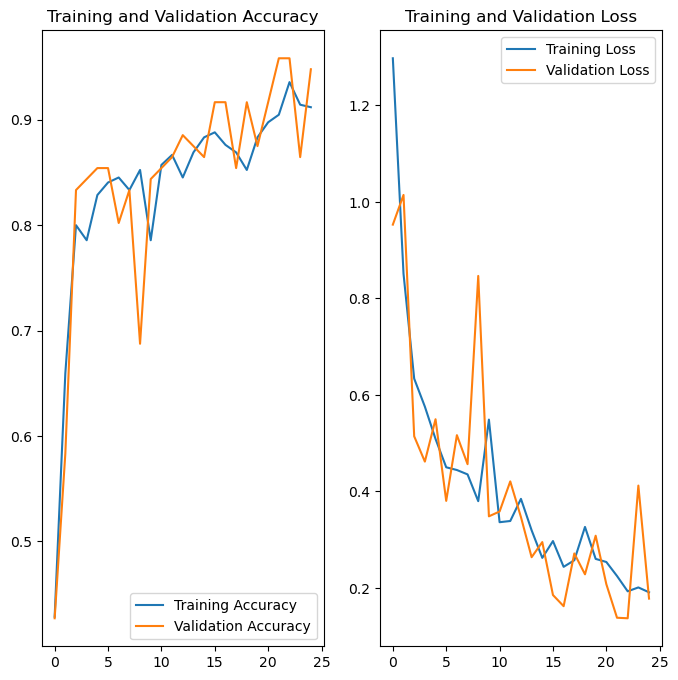

In [31]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
predicted label: Potato___Early_blight


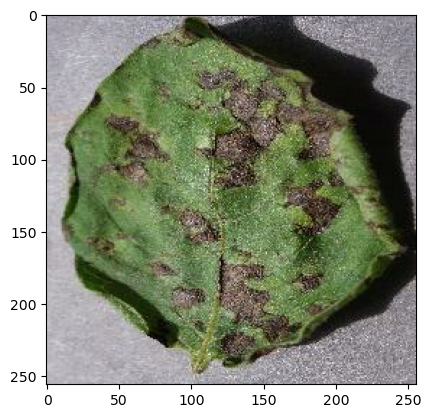

In [32]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [33]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


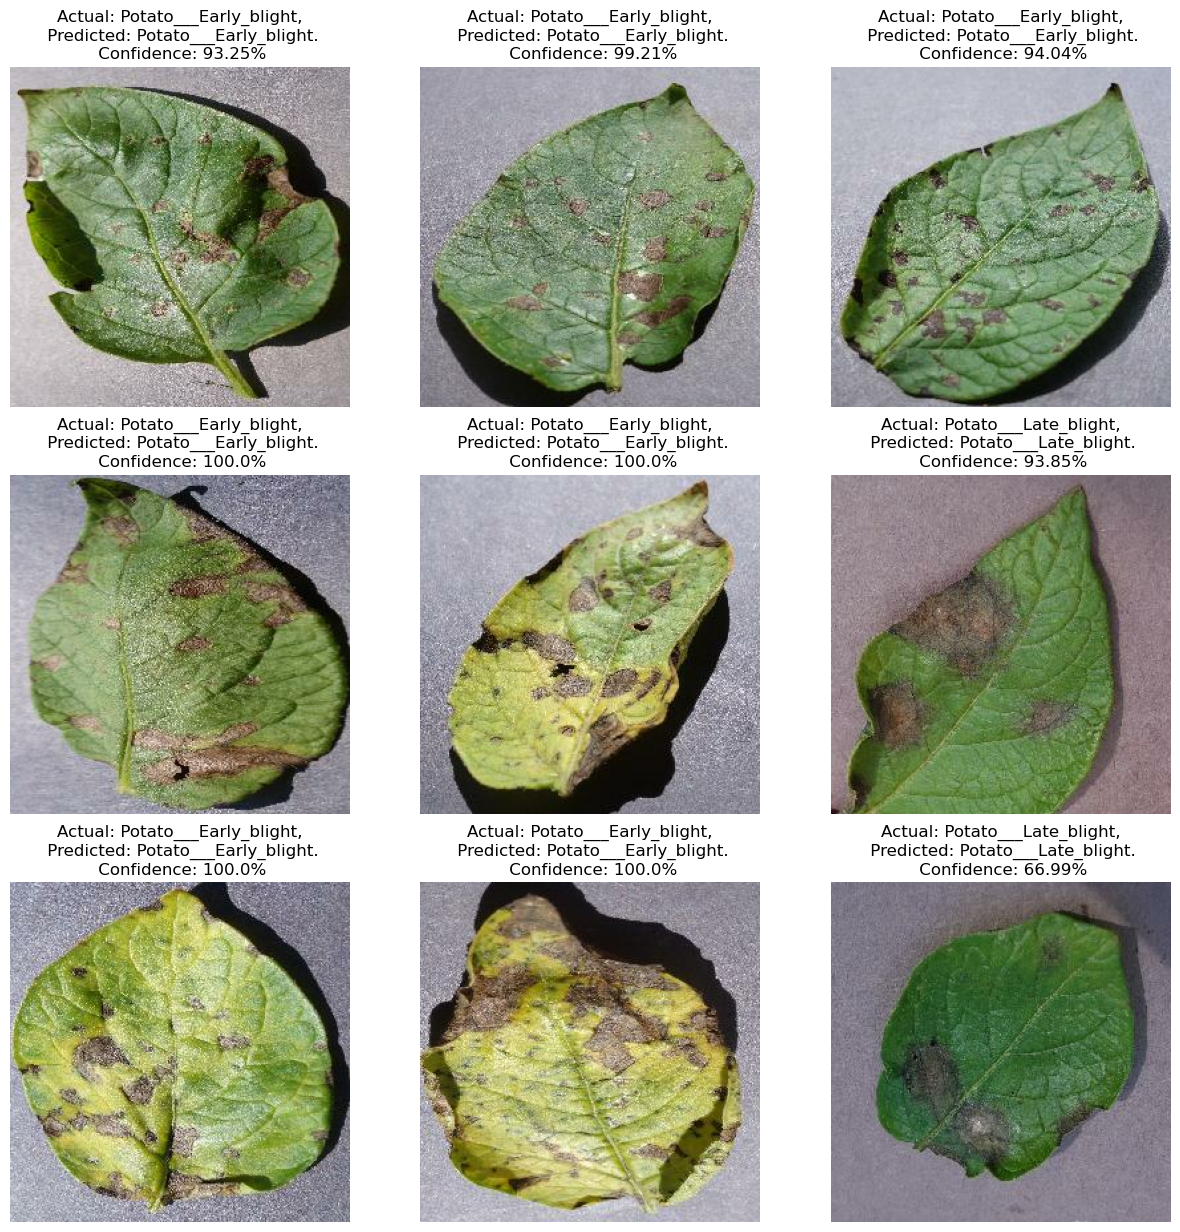

In [34]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")